## Codecademy data science path

In [93]:
pip install -U numpy

Note: you may need to restart the kernel to use updated packages.


In [94]:
#https://www.kaggle.com/datasets/kunwarakash/chennai-housing-sales-price
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from math import ceil
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_1samp
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Analysis purpose

**we're going to analyze houseing prices of sales and main factors of price using statistics and vizualize variables**

In [95]:
data=pd.read_csv('houseing-sale.csv',parse_dates=True)

In [96]:
data.head(7)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,...,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,No,...,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790


**there seems to be 22 columns**

In [97]:
#shape info
print(f"shape of our data {data.shape}")

shape of our data (7109, 22)


## Data Description

data available on kaggle https://www.kaggle.com/datasets/kunwarakash/chennai-housing-sales-price

houseing price in Chennai

PRT_ID :Id of house

AREA : In which area house is located in Chennai

Sales_cond : Sale condition

Park_FACil: Is parking available or not

...


**we can already consider we don't need the ID and we can drop it**

In [98]:
data=data.drop(columns='PRT_ID')

## Let's handle missing values

In [99]:
data.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

since there is a low amount of null type we can drop them

In [100]:
data.dropna(axis=0,inplace=True)
data.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

no more null values

## Check typing

let's have a look about the data types of our columns

In [101]:
data.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

we can see N_BEROOM and N_BATHROOM have float types instead of int


dates are also stored as objects

In [102]:
data=data.astype({'N_BEDROOM':'int64','N_BATHROOM':'int64'})
data['DATE_SALE']=pd.to_datetime(data['DATE_SALE']);
data['DATE_BUILD']=pd.to_datetime(data['DATE_BUILD']);
data.dtypes

C:\Users\gabri\AppData\Local\Temp\ipykernel_2420\3589727647.py:2: UserWarning: Parsing '19-12-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['DATE_SALE']=pd.to_datetime(data['DATE_SALE']);
C:\Users\gabri\AppData\Local\Temp\ipykernel_2420\3589727647.py:2: UserWarning: Parsing '13-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['DATE_SALE']=pd.to_datetime(data['DATE_SALE']);
C:\Users\gabri\AppData\Local\Temp\ipykernel_2420\3589727647.py:2: UserWarning: Parsing '13-03-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['DATE_SALE']=pd.to_datetime(data['DATE_SALE']);
C:\Users\gabri\AppData\Local\Temp\ipykernel_2420\3589727647.py:2: UserWarning: Parsing '22-06-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['DATE_SALE']=pd.to_datetime(data

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

## Overall description

In [103]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03
mean,1381.316752,99.569161,1.636621,1.213152,3.686650,3.517177,3.505896,3.485332,3.503389,376791.852608,140994.273384,1.088801e+07
std,457.860850,57.403870,0.803633,0.409563,1.020011,0.892141,0.897644,0.886814,0.527313,143109.581793,78774.465963,3.769081e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272117.500000,84212.750000,8.266790e+06
50%,1369.500000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349444.500000,127640.500000,1.031922e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451030.500000,184449.000000,1.298148e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


**feature repartitions**

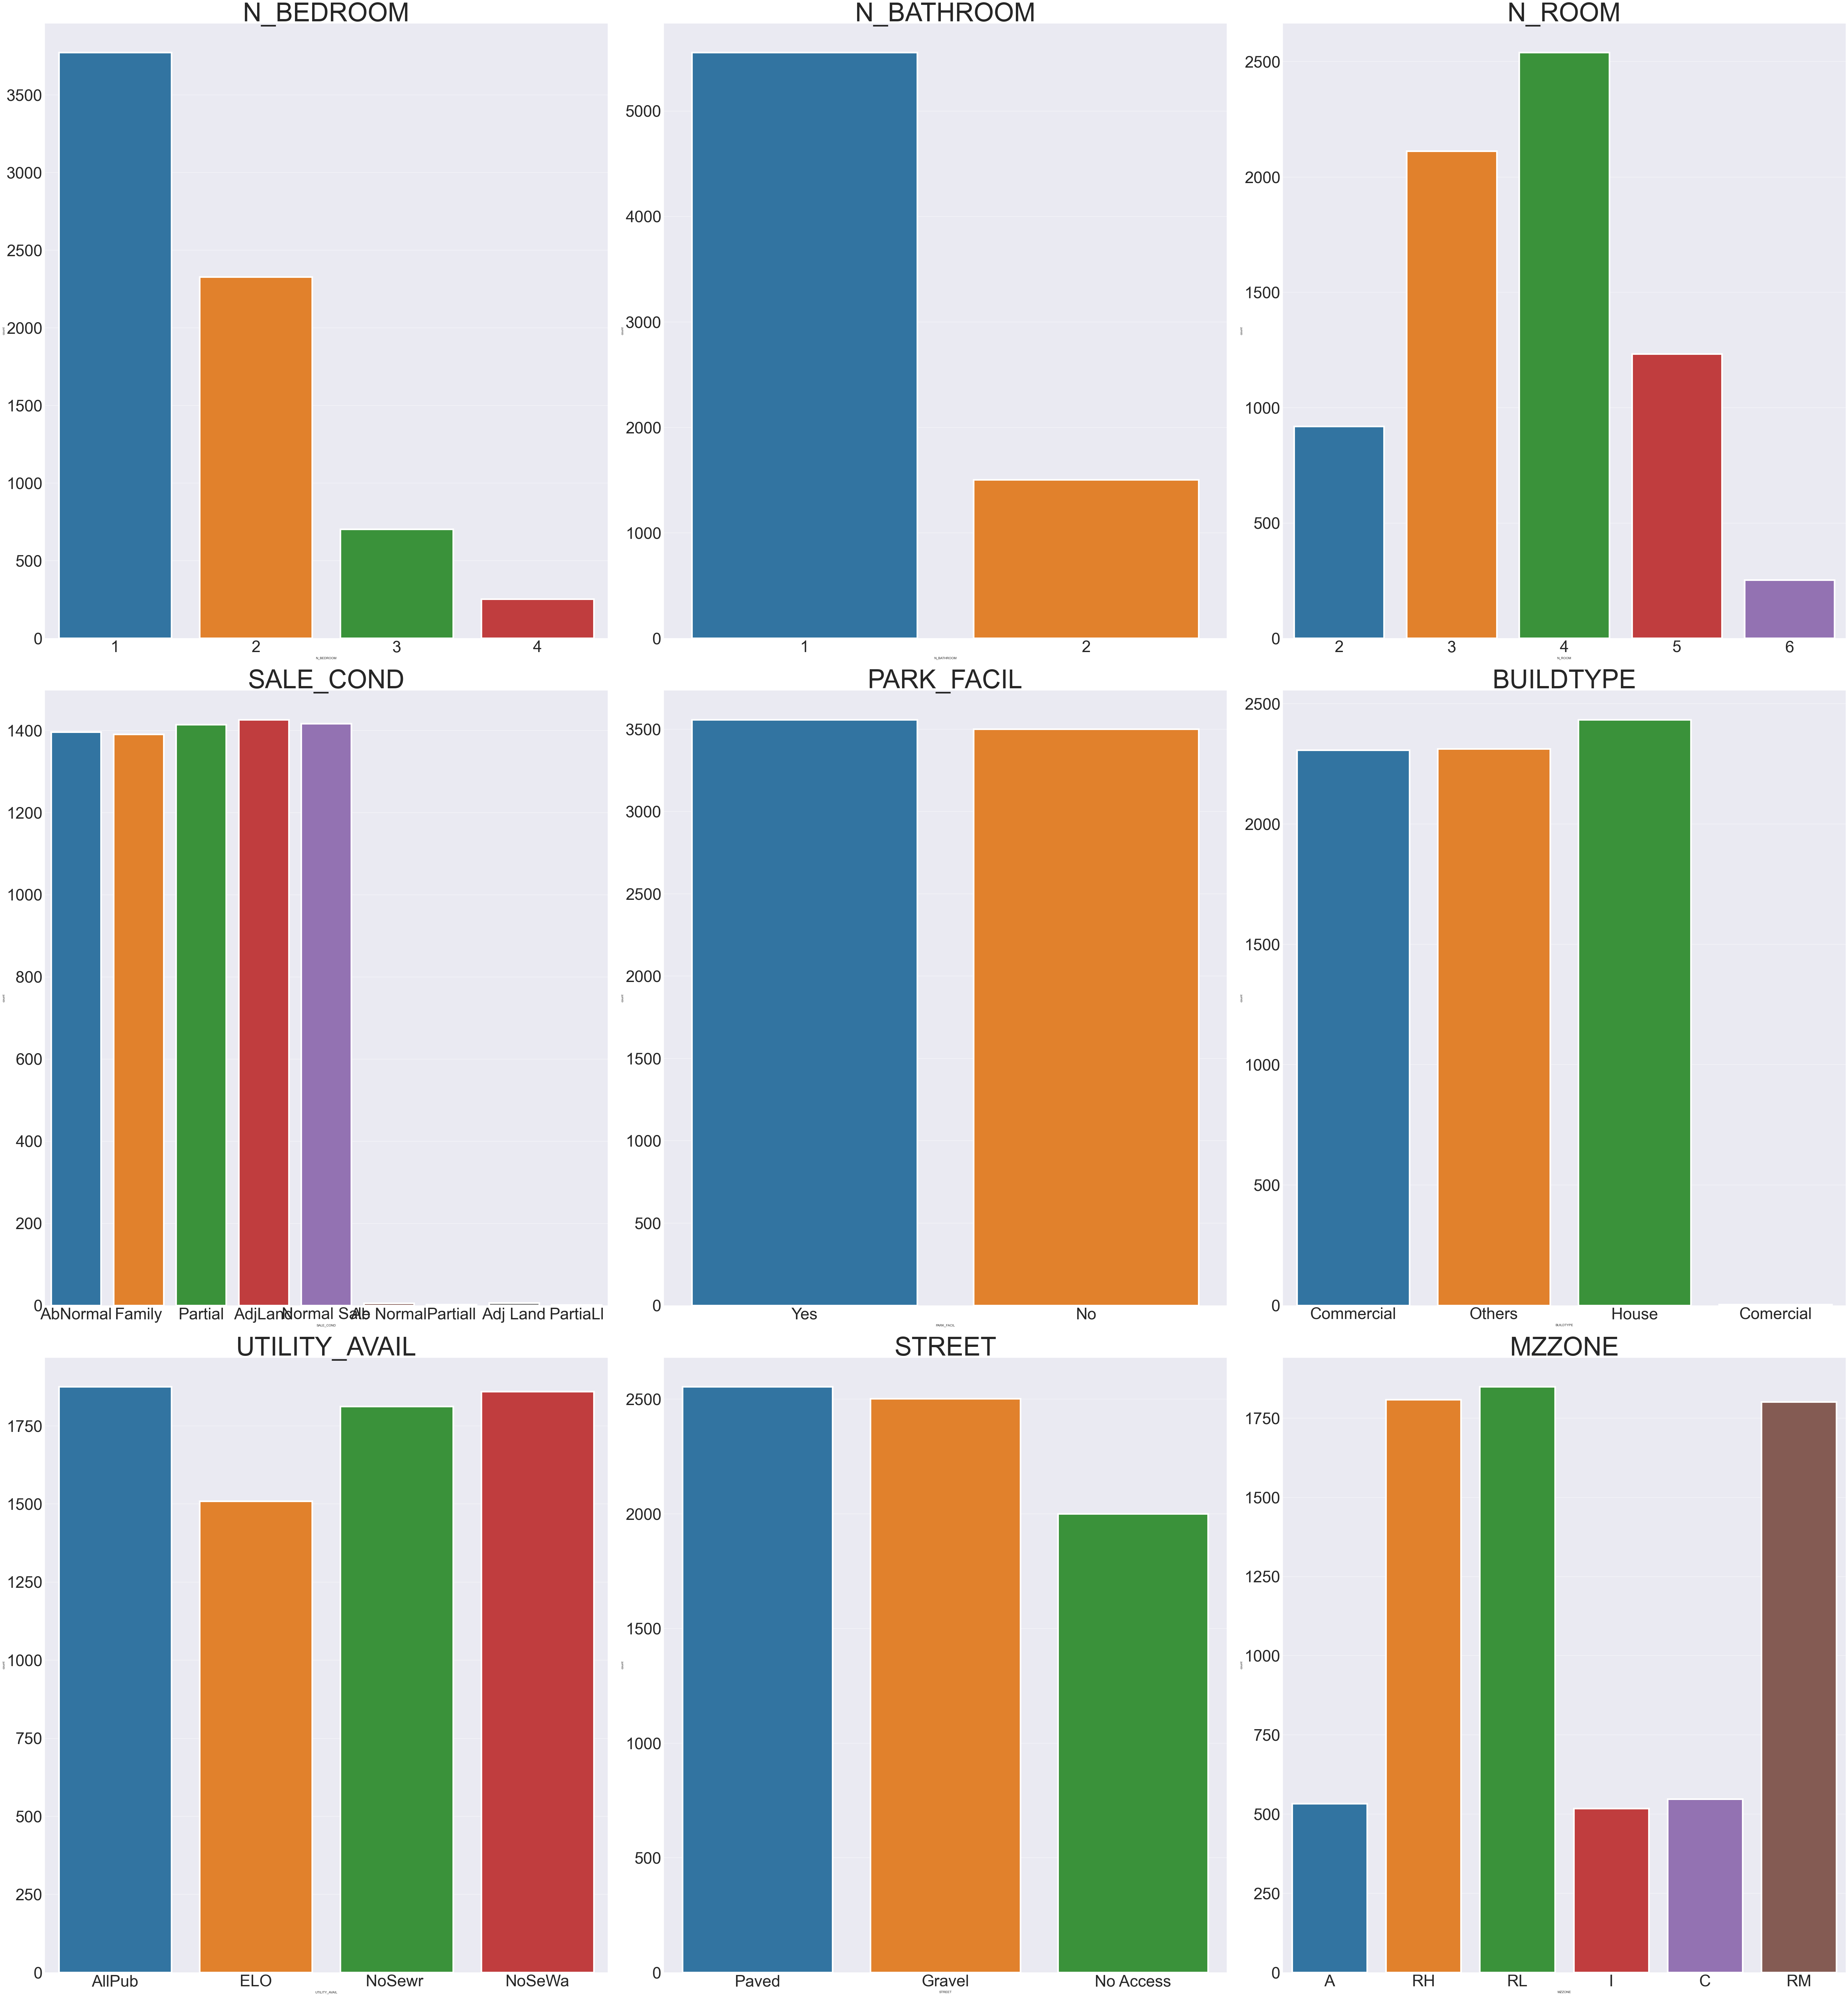

In [119]:
sns.set_style('darkgrid')
def countplot(df,max_columns,val,figsize,title_size=20,title=""):
    l=len(df.columns)
    ligns=ceil(l/max_columns)
    fig=plt.figure(1,figsize=figsize)
    i=1
    
    for col in df.columns:
        if len(pd.unique(df[col]))<val:
            plt.subplot(ligns,max_columns,i)
            plt.title(col, fontsize=title_size)
            i=i+1
            p=sns.countplot(data = df, x=col,linewidth=5)
            #to increase y ticks size
            plt.yticks(size=50)
            #to increase x ticks 
            plt.xticks(size=50)
            
    fig.tight_layout(pad=3.0)
    
    fig.suptitle(title)
    plt.show()
    
title="Different Countplots"
countplot(data,3,15,(80,200),80)
#countsplot dataframe,columns spliting,max_uniquevalues,figsize,title,title_size

we can see park_facil has the value noo and buildtype has the values other and others wich means the same

Pavd in street

In [118]:

data=data.replace({'Noo':'No','Other':'Others','Pavd':'Paved','NoAccess':'No Access','All Pub':'AllPub'})

**now the graphic looks like this**

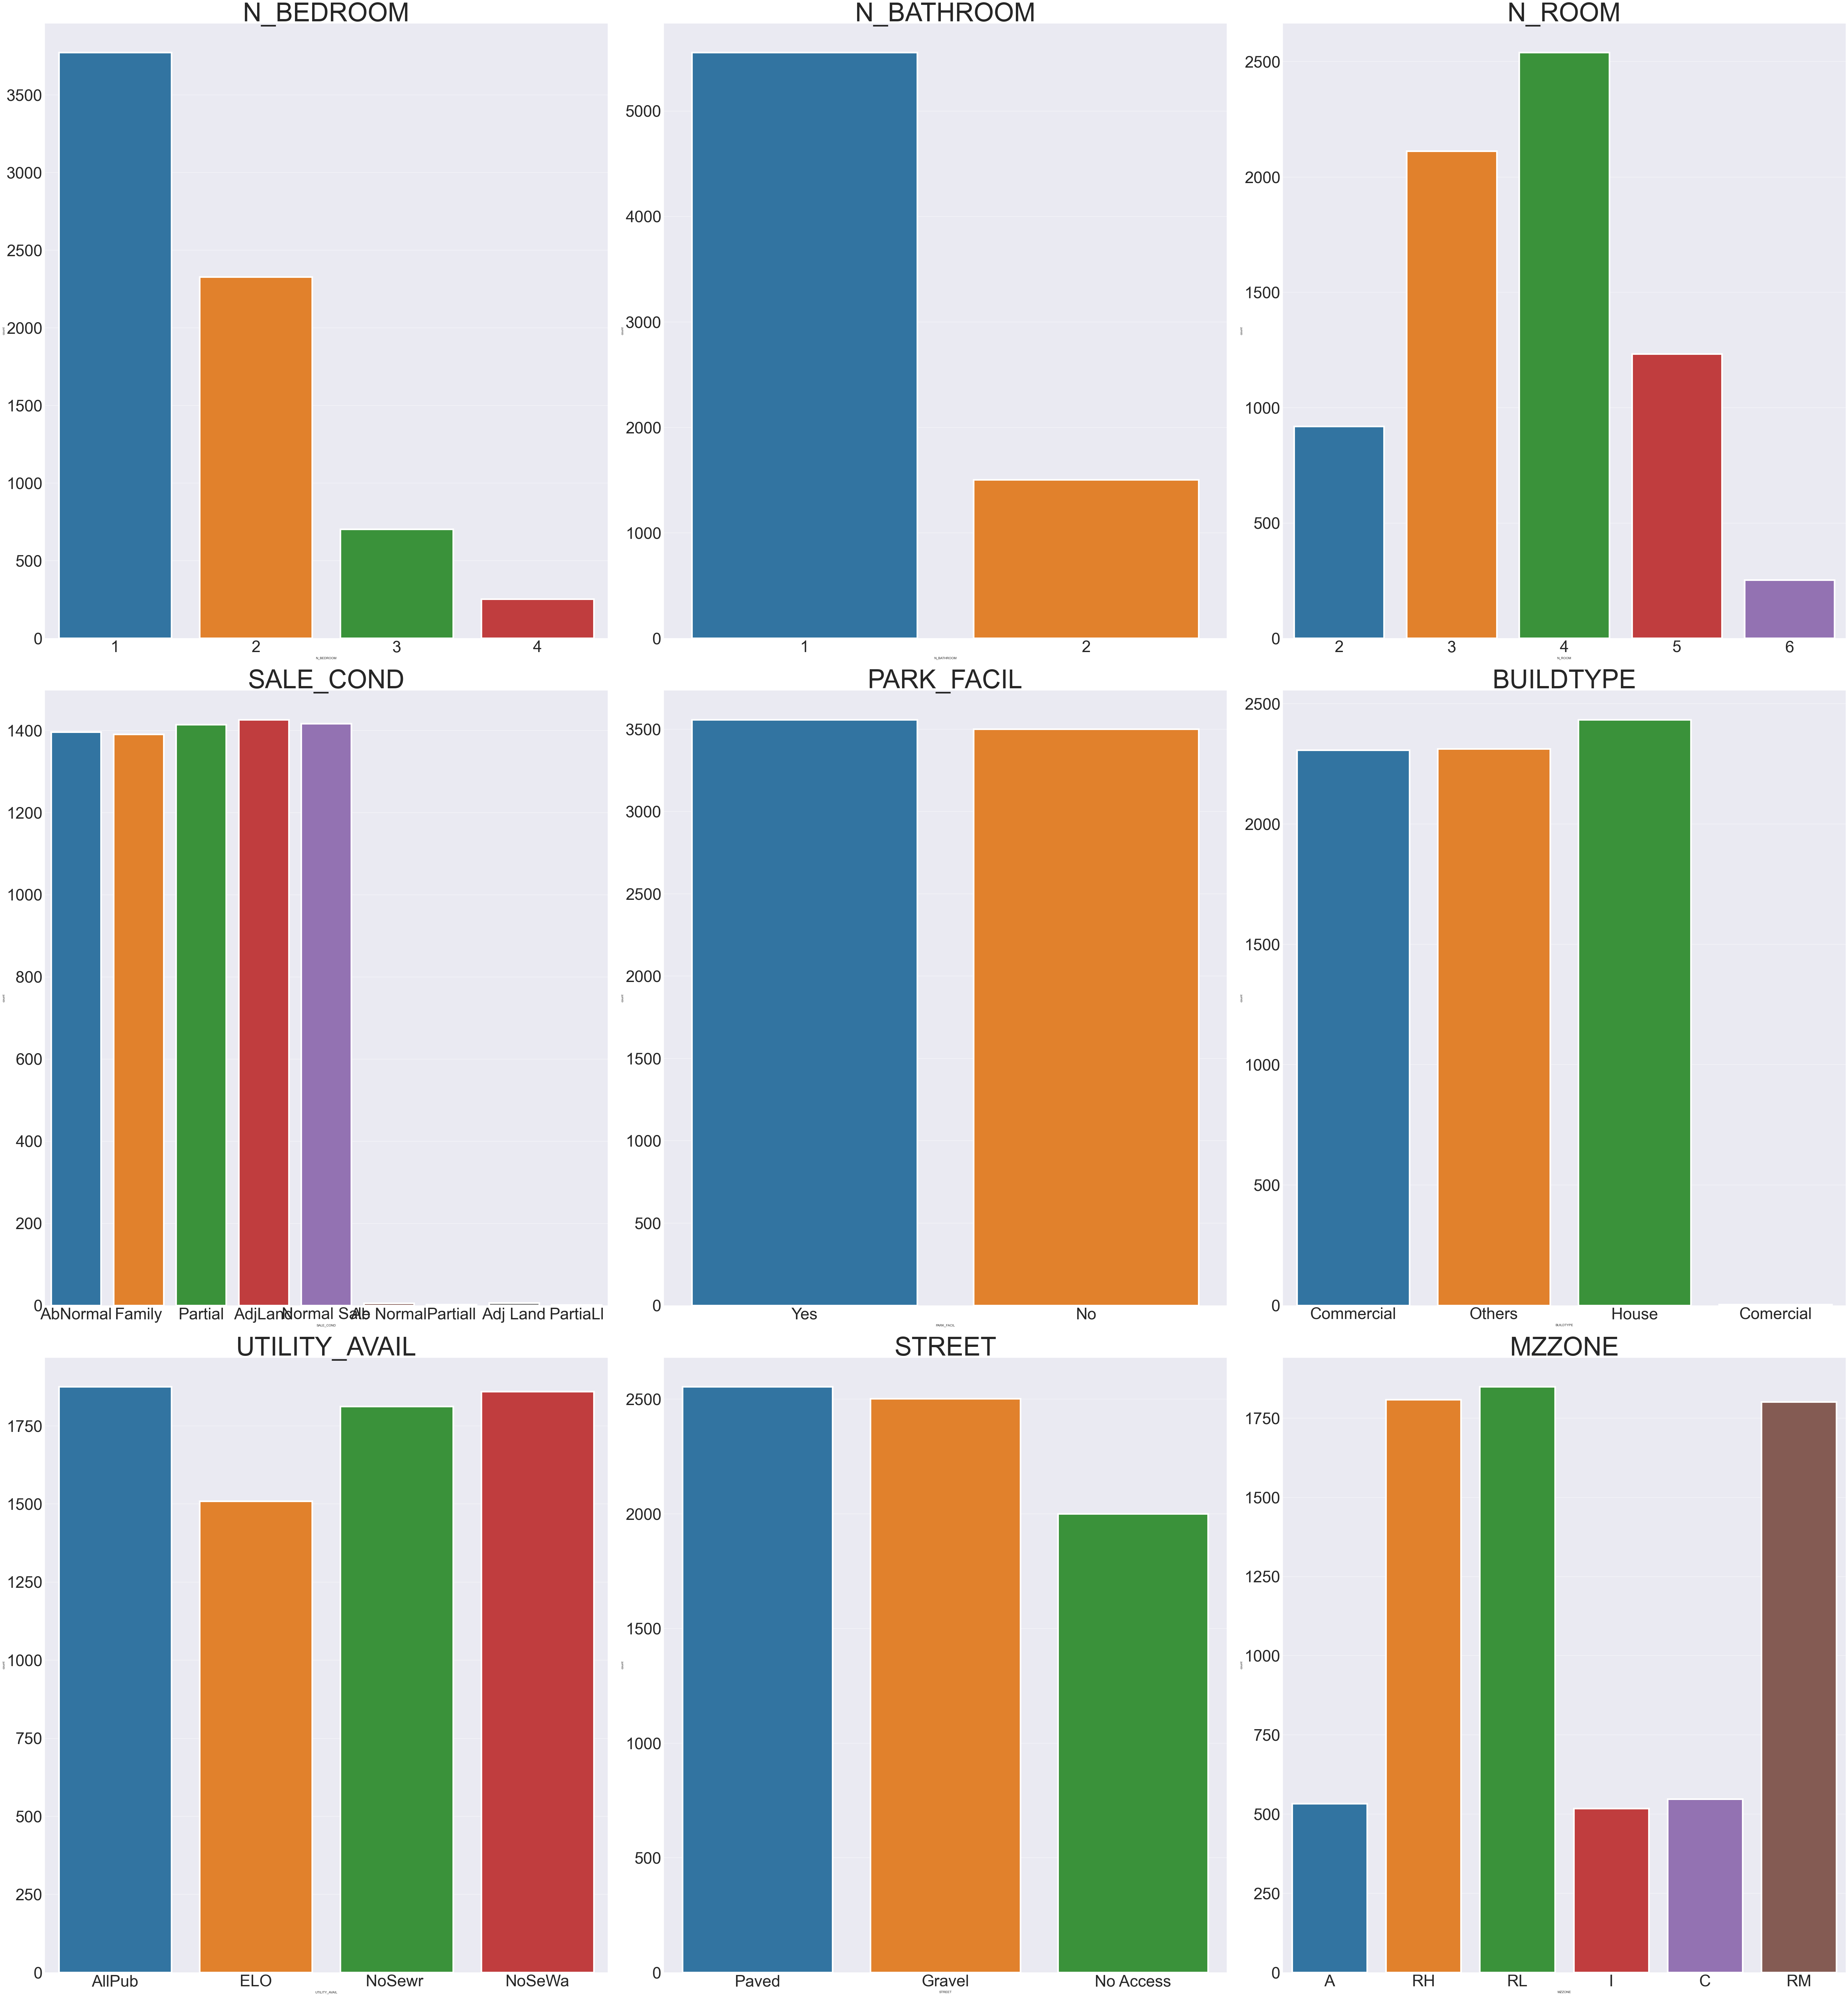

In [120]:
countplot(data,3,15,(80,200),80)

## Sales price univariate analysis

**note** we have no info about the currency, since the location is in Chennai,India and by the following values, we gonna assume those are rupees.

In [106]:
data.SALES_PRICE.describe()

count    7.056000e+03
mean     1.088801e+07
std      3.769081e+06
min      2.156875e+06
25%      8.266790e+06
50%      1.031922e+07
75%      1.298148e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

**Boxplot**


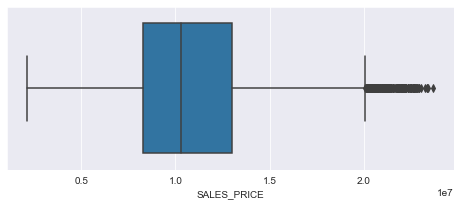

In [107]:
plt.figure(figsize=(8,3))
sns.boxplot(data=data,x='SALES_PRICE')
plt.show()

**Histogram**

<Figure size 576x216 with 0 Axes>

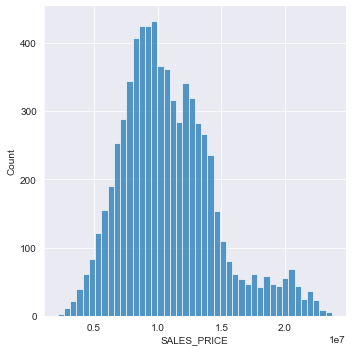

In [108]:
plt.figure(figsize=(8,3))
sns.displot(data=data,x='SALES_PRICE')
plt.show()

**Histogram by area**

<Figure size 576x216 with 0 Axes>

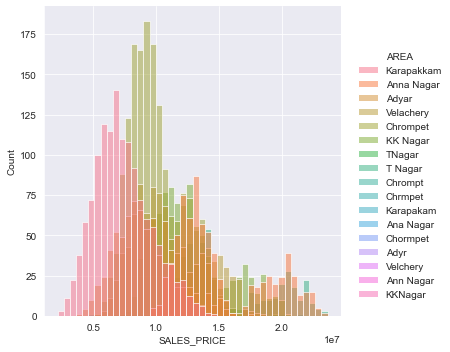

In [109]:
plt.figure(figsize=(8,3))
sns.displot(data=data,x='SALES_PRICE',hue='AREA')
plt.show()

## Multivariate analysis

we're going to explore associations between sales_price and other variables

**linear correlations**

<AxesSubplot:>

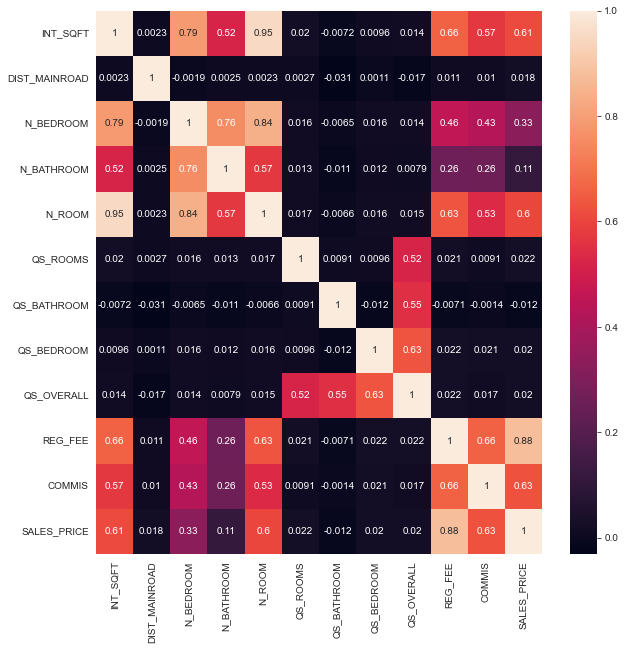

In [110]:
plt.figure(figsize=(10,10))
sns.heatmap(data.drop(columns='PARK_FACIL').corr(),annot=True)

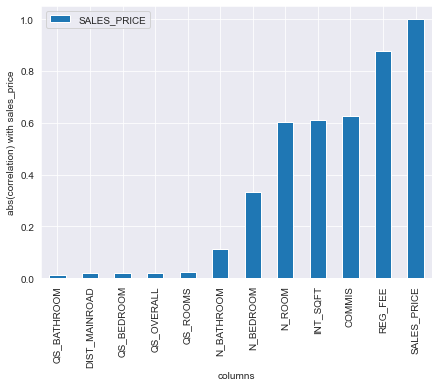

In [111]:
plt.figure(figsize=(7,5))
np.abs(data.drop(columns='PARK_FACIL').corr()['SALES_PRICE'].sort_values()).plot(kind='bar')
plt.xlabel('columns')
plt.ylabel('abs(correlation) with sales_price')
plt.legend()
plt.show()

we can see the best linear correlation is from the 'REG_FEE' variable which are the Registration fee after sales

then commission fee

then square feet 

In [112]:
#sns.pairplot(data=data,hue='AREA')

**we can seem to find any non-linear associations**

<AxesSubplot:xlabel='REG_FEE', ylabel='SALES_PRICE'>

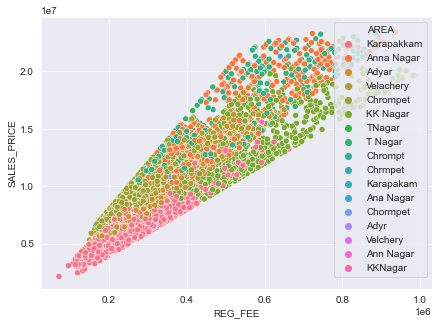

In [113]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data,x='REG_FEE',y='SALES_PRICE',hue='AREA')


<AxesSubplot:xlabel='COMMIS', ylabel='SALES_PRICE'>

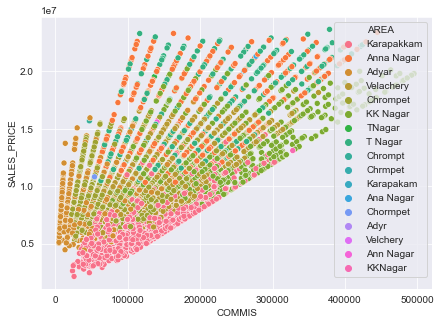

In [114]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data,x='COMMIS',y='SALES_PRICE',hue='AREA')

## Hypothesis testing

## Associations between categorical variables and Sales_Price : Anova

In [115]:
data

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,51,1,1,2,AdjLand,No,1962-01-15,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,Velachery,1897,2004-08-04,52,3,2,5,Family,Yes,1995-11-04,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,1978-01-09,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,Karapakkam,787,2009-03-08,40,1,1,2,Partial,Yes,1977-11-08,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [116]:
cols=['PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','AREA','SALE_COND','STREET','MZZONE']
for item in cols:
    model=ols('SALES_PRICE ~ {}'.format(item),data=data).fit()
    anova_result=sm.stats.anova_lm(model,typ=2)
    print(anova_result.head())
    print()

                  sum_sq      df          F        PR(>F)
PARK_FACIL  2.164999e+15     1.0  155.74337  2.272018e-35
Residual    9.805815e+16  7054.0        NaN           NaN

                 sum_sq      df            F  PR(>F)
BUILDTYPE  3.115133e+16     3.0  1060.148613     0.0
Residual   6.907182e+16  7052.0          NaN     NaN

                     sum_sq      df         F        PR(>F)
UTILITY_AVAIL  4.804360e+14     4.0  8.490731  7.863285e-07
Residual       9.974271e+16  7051.0       NaN           NaN

                sum_sq      df           F  PR(>F)
AREA      4.935303e+16    16.0  426.817382     0.0
Residual  5.087011e+16  7039.0         NaN     NaN

                 sum_sq      df         F    PR(>F)
SALE_COND  3.580091e+14     8.0  3.157872  0.001422
Residual   9.986514e+16  7047.0       NaN       NaN

                sum_sq      df          F        PR(>F)
STREET    2.443403e+15     2.0  88.123183  1.581056e-38
Residual  9.777974e+16  7053.0        NaN           NaN

    

**we can see some significant different sales price with group of houses**

## Tuckey test

In [117]:
tukey_results_build = pairwise_tukeyhsd(data.SALES_PRICE, data.BUILDTYPE, 0.05)
tukey_results_street = pairwise_tukeyhsd(data.SALES_PRICE, data.STREET, 0.05)
print(tukey_results_build)
print(tukey_results_street)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
  group1     group2      meandiff   p-adj      lower         upper     reject
-----------------------------------------------------------------------------
 Comercial Commercial  3802352.7883 0.0721  -222145.4112  7826850.9877  False
 Comercial      House  -975532.6418    0.9 -4999850.4647  3048785.1811  False
 Comercial     Others  -277629.3382    0.9 -4302120.0054   3746861.329  False
Commercial      House -4777885.4301  0.001 -5011586.0566 -4544184.8035   True
Commercial     Others -4079982.1265  0.001 -4316640.4734 -3843323.7796   True
     House     Others   697903.3036  0.001   464332.4237   931474.1834   True
-----------------------------------------------------------------------------
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1    group2    meandiff   p-adj     lower         upper     reject
------------------------------------------------------------------------

let's vizualize mean diffs

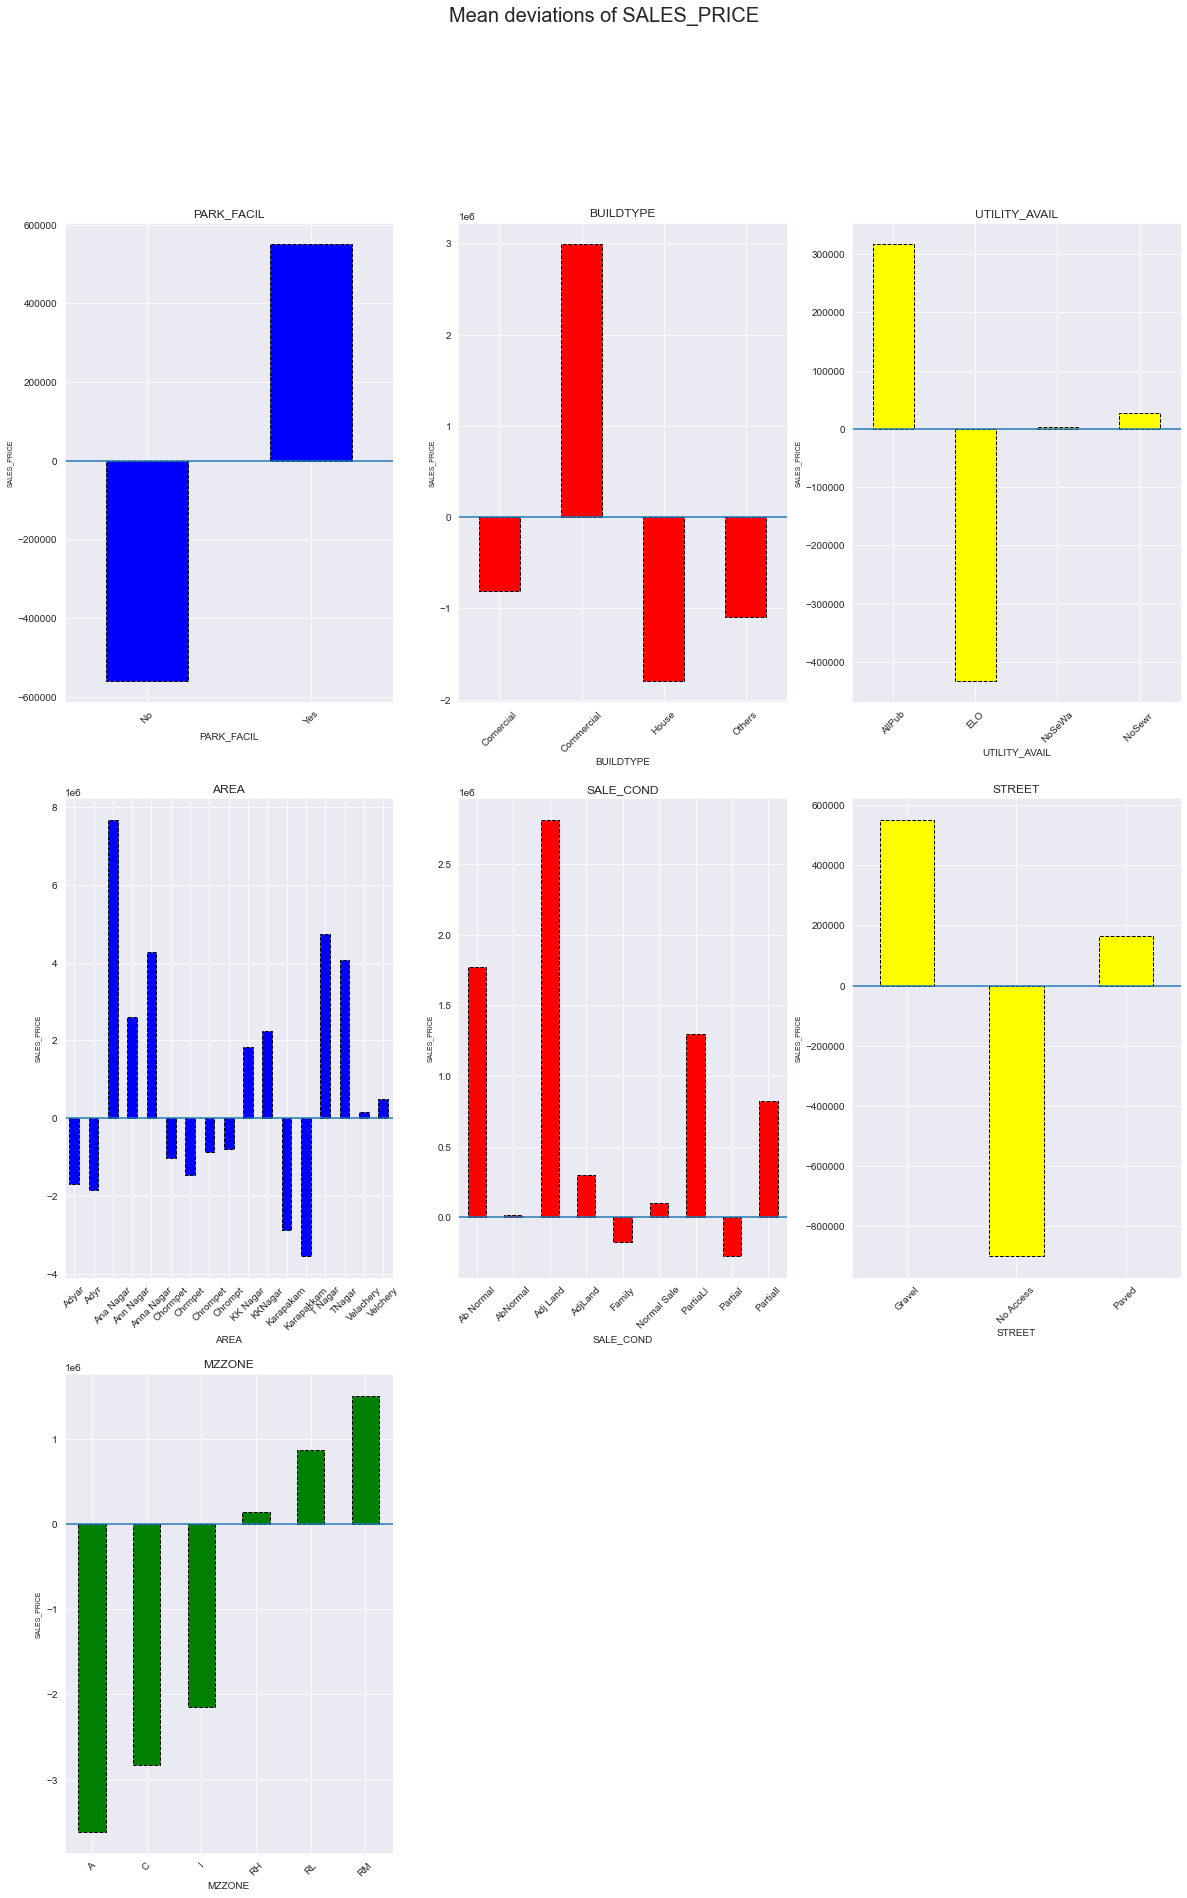

In [128]:
def mean_dev(dataframe,target,maxcol,cols,palette,size):
    moy=dataframe[target].mean()
    fig=plt.figure(figsize=size)
    plt.suptitle("Mean deviations of "+str(target),size=20)
    l=len(cols)
    ligns=ceil(l/maxcol)
    i=1
    for item in cols:
        plt.subplot(ligns,maxcol,i)
        plt.title(item)
        (dataframe.groupby(str(item))[str(target)].mean()-moy).plot(kind='bar',color=palette[i-1],ls='dashed',edgecolor='Black')
        plt.ylabel(str(target),size=7)
        plt.xticks(rotation = 45)
        plt.axhline(y=0)
        i =i+1
    plt.show()
    fig.tight_layout(pad=2.0)

mean_dev(data,'SALES_PRICE',3,cols,['Blue','Red','Yellow','Blue','Red','Yellow','Green'],(20,30))

## Conclusion

**we've studied houseing sales to get associations with the sale prices, what we got is association with the number of rooms the size of the house in square feet the Area the street...**